In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi

In [2]:
qc = QuantumCircuit(2)
#C = control qubit
c=0
#t = target qubit
t=1

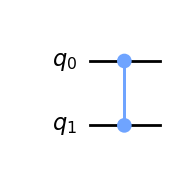

In [3]:
qc.cz(c,t)
qc.draw(output='mpl')

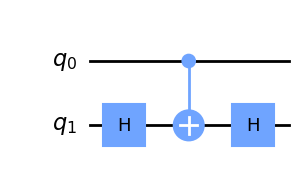

In [4]:
qc = QuantumCircuit(2)
#controlled z gate
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw(output='mpl')

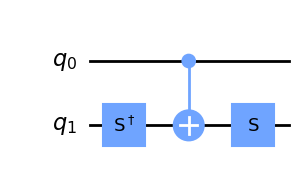

In [5]:
qc = QuantumCircuit(2)
#Controlled-Y gate
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
qc.draw(output='mpl')

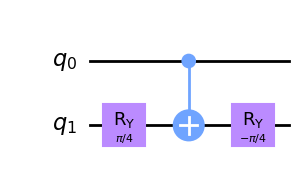

In [6]:
qc = QuantumCircuit(2)
#controlled H gate
qc.ry(pi/4, t)
qc.cx(c,t)
qc.ry(-pi/4,t)
qc.draw(output='mpl')

In [7]:
#swapping qubit
a = 0
b = 1

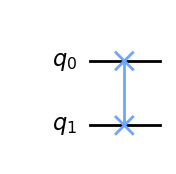

In [8]:
qc = QuantumCircuit(2)
qc.swap(a,b)
qc.draw(output='mpl')

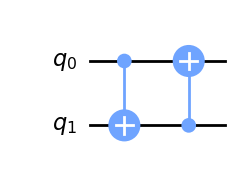

In [9]:
qc = QuantumCircuit(2)

qc.cx(a,b) #a에서 b로 복사
qc.cx(b,a) #복사된 b에서 a의 상태를 변경
qc.draw(output='mpl')

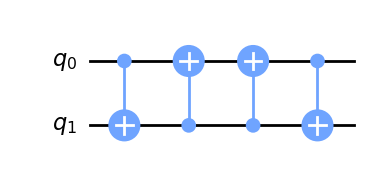

In [10]:
qc.cx(b,a) #b에서 a로 복사
qc.cx(a,b) #a의 상태에 맞춰 b의 상태를 변경
qc.draw(output='mpl')

In [11]:
#여기서 cx는 두 번 적용해도 결과가 바뀌지 않음
#>cx 게이트를 하나로 줄여도 무방함

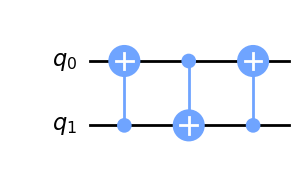

In [12]:
qc = QuantumCircuit(2)
#swap gate와 같은 역할을 하게 됨
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw(output='mpl')

Controlled Rotations
control 되는 gate들의 공통 사항은 중간에cx들로 control qubit의 상태를 이용하여 not으로 변경되거나 변경되지 않는 상태로 진행되어
이후 진행되는 추가 gate를 통해 gate를 통과한 최종 결과가 control qubit의 상태에 따라 gate의 기능이 동작하거나(oontrol qubit이 1state)
gate의 기능이 동작하지 않는 (control qubit이 0state)로 진행됨

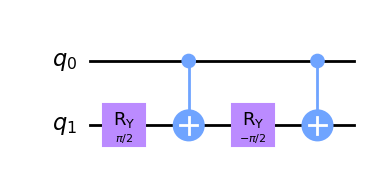

In [14]:
qc = QuantumCircuit(2)
theta = pi
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
qc.draw(output='mpl')

x와 y 축이 서로 수직(orthogonal)한 상태이므로 가능한 기능
Rx, Rz 게이트도 control 형태로 적용하면 (CNOT gate 활용)
위와 비슷한 형태로 나타나게 됨
superposition state일 경우에도 중요하게 쓰임

In [16]:
#Any Single qubit rotation V (controllable)
A = Gate('A', 1, [])
B = Gate('B', 1, [])
C = Gate('C', 1, [])
alpha = 1

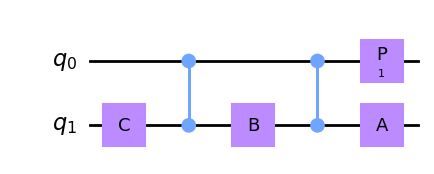

In [17]:
#아래의 Quantum Circuit이 V matrix 연산과 같음
qc = QuantumCircuit(2)
qc.append(C, [t])
qc.cz(c,t)
qc.append(B, [t])
qc.cz(c,t)
qc.append(A, [t])
qc.p(alpha, c)
qc.draw(output='mpl')

Toffoli
Toffoli gate : 2개의 control qubit, 1개의 target qubit
control qubit 모두 state1일 때 target qubit에 X(NOT) gate를 적용시킴
controlled=controlled-NOT gate ccx gate

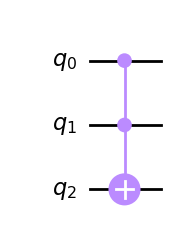

In [19]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
qc.ccx(a,b,t)
qc.draw(output='mpl')

일반적인 controlled controlled U gate를 만드는데 toffoli gate를 활용할 수 있음
아래의 예시는 2개의 control qubit을 이용하여 동작하는 U gate

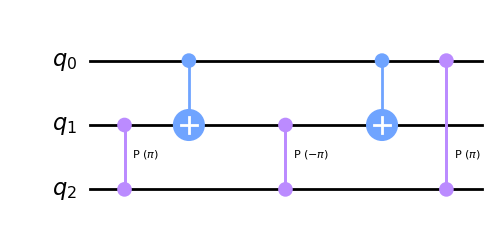

In [21]:
qc = QuantumCircuit(3)
#V gate
qc.cp(theta, b, t)
qc.cx(a,b)
#Vdagger gate
qc.cp(-theta, b, t)
qc.cx(a,b)
#V gate
qc.cp(theta, a, t)
qc.draw(output='mpl')

아래의 예시는 cnot gate 하나로 controlled hadamard gate, controlled z gate를 만든 것

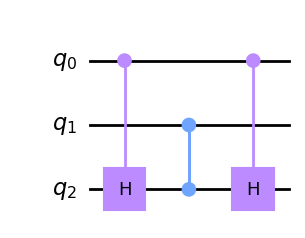

In [23]:
qc = QuantumCircuit(3)
#controlled hadamard gate
qc.ch(a,t)
#controlled z gate
qc.cz(b,t)
qc.ch(a,t)
qc.draw(output='mpl')

위의 게이트는 control qubit의 상태에 따라 hadamard gate가 적용되거나 z gate가 적용되거나 둘 다 적용되거나 둘 다 적용되지 않을 수도 있음


qubit은 noise(오류)등이 발생할 수 있는데 온도, 자기장, 이웃 qubit의 영향 등에 따라 원치 않는 상태로 전환될 수 있음
quantum computer에서 qubit은 저런 noise의 상태에서 보호되어야 하는데 gate의 동작을 실수로 동작하지 않도록 어렵게 만들면 됨
단일 qubit 회전 같은 Rx, Ry, Rz와 같은 경우는 theta의 정확한 값을 집어넣어 동작하게 만드는데 한계가 있음
예를들어 우리가 20도를 회전시킨다고 할 때 20.00001도 같은 형태의 회전이 들어가게 된다면....?
보다 큰 circuit을 만들게 되면 저 에러들을 최대한 줄여야 함
이런 노이즈 제거등에 활용하는 gate는 H, T gate등 이 있음

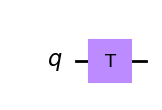

In [25]:
qc = QuantumCircuit(1)
qc.t(0)
qc.draw(output='mpl')

T gate : z축 기준으로 pi/4만큼 회전시키는 gate

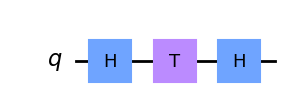

In [26]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw(output='mpl')

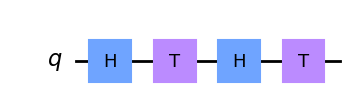

In [27]:
#Rz(pi/4), Rx(pi/4) gate
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.draw(output='mpl')

몹시 작은 각도로 회전시키고 싶을 땐....?
각도 자체는 0과2pi 사이의 값을 갖게 되므로 각 사이를 n으로 쪼개어 2pi/n으로 만들고..
n+1번 회전시키면 n번 회전시킨 각도와의 차이는 2pi/n만큼 나게 됨
그리고 오차가 나게 되더라도 2pi/n보다는 작게 차이남
gate를 여러번 통과시켜 해당 각도만큼 돌리게 하고 

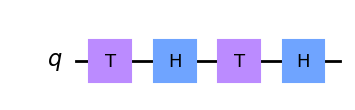

In [28]:
qc = QuantumCircuit(1)
qc.t(0)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw(output='mpl')